# Block 38: Demonstration - Part 1 (Solution)
## __Stochastic Gradient Descent (SGD)__
- Stochastic Gradient Descent (SGD) is an optimization algorithm, commonly used in machine learning to train models. It is easier to fit into memory due to a single training sample being processed by the network.
- It is computationally fast as only one sample is processed at a time. For larger datasets, it can converge faster as it causes updates to the parameters more frequently.

## Steps to Be Followed:
1. Importing the required library
2. Loading the dataset
3. Preparing the data
4. Filtering the DataFrames
5. Initializing the scale variable
6. Implementing the SGD algorithm
7. Plotting the graph

  ### Step 1: Importing the Required Libraries

  - It imports the necessary libraries and modules for data analysis and evaluation tasks.

  - It specifically imports NumPy (for numerical operations), Pandas (for data manipulation), Matplotlib (for data visualization), and scikit-learn (for machine learning tasks) modules and functions.
  - The **fetch_california_housing** function is used to load the California housing dataset, and **mean_squared_error** is a metric function used to evaluate the performance of a regression model.

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

### Step 2: Loading the Dataset
- The **housing_data = fetch_california_housing()** loads the California housing dataset into the **housing_data** variable. This dataset contains information about housing prices and various features related to housing in different regions of California.

In [2]:
# Use the fetch_california_housing function to load the California housing dataset.
# This function loads and returns a dataset containing housing data for various regions in California.
housing_data = fetch_california_housing()

In [3]:
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### Step 3: Preparing the Data

- Create a DataFrame **Features** to store the feature data from the **fetch_california_housing** dataset.
- Create another DataFrame **Target** to store the target variable values.
- Use the **join()** method to combine the feature and target DataFrames.
- Use the **head()** function is used to display the first 5 rows of the DataFrame df.

In [4]:
# Create a DataFrame 'Features' using the data from the 'housing_data' dataset and set the column names to the feature names.
# This DataFrame will hold the features (input variables) of the housing dataset.
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

# Create a DataFrame 'Target' using the target data from the 'housing_data' dataset and set the column name to "Target".
# This DataFrame will hold the target values (output variable) of the housing dataset.
Target = pd.DataFrame(housing_data.target, columns=["Target"])


In [5]:
# Combine the 'Features' DataFrame and 'Target' DataFrame using the 'join' method.
# This creates a new DataFrame 'df' that contains both the feature columns and the target column.
df = Features.join(Target)
df.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

**Observation**

- The output represents a DataFrame with several columns:

  - **MedInc**: Median income in the block.
  - **HouseAge**: Median house age in the block.
  - **AveRooms**: Average number of rooms per dwelling.
  - **AveBedrms**: Average number of bedrooms per dwelling.
  - **Population**: Block population.
  - **AveOccup**: Average number of occupants per dwelling.
  - **Latitude**: Latitude of the block's location.
  - **Longitude**: Longitude of the block's location.
  - **Target**: Target variable, representing the median house value for the block.
- Each row in the DataFrame corresponds to a specific block or housing unit, and the columns represent different features and the target variable associated with each block.

### Step 4: Filtering the DataFrames

- It filters the DataFrame df based on two conditions:

  - **df[df.Target < 3.5]**: This line filters the DataFrame to include only rows where the value in the "Target" column is less than 3.5. It creates a new DataFrame with only those rows that meet this condition.

  - **df[df.MedInc < 8]**: This line further filters the previously filtered DataFrame to include only rows where the value in the "MedInc" column is less than 8. It creates another new DataFrame with rows that meet both conditions (Target < 3.5 and MedInc < 8).

In [6]:
# Filter the DataFrame 'df' to include only rows where the 'Target' column values are less than 3.5.
# This filters out rows that do not meet this condition.
df = df[df.Target < 3.5]

# Further filter the DataFrame 'df' to include only rows where the 'MedInc' column values are less than 8.
# This filters out rows that do not meet this condition.
df = df[df.MedInc < 8]




- It computes the descriptive statistics of the **MedInc** and **Target** columns in the DataFrame df and returns the statistics excluding the count.

In [7]:
# Select the columns 'MedInc' and 'Target' from the DataFrame 'df', and then use the 'describe' method to compute
# summary statistics for these selected columns. The [1:] slicing is used to exclude the count row and display only
# the statistics (mean, std, min, 25%, 50%, and 75%) for the selected columns.
df[['MedInc', 'Target']].describe()[1:]


MedInc    Target
mean  3.482030  1.722805
std   1.364922  0.749957
min   0.499900  0.149990
25%   2.452025  1.119000
50%   3.303600  1.635000
75%   4.346050  2.256000
max   7.988700  3.499000

**Observation**
- The given step computes and displays the descriptive statistics, such as mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile, and maximum, for the 'MedInc' and 'Target' columns of the DataFrame df.

### Step 5: Initializing the Scale Variable

- The function **scale(x)** is defined to perform feature scaling on a given input **x**, using min-max normalization.
- The **min** and **max** variables are calculated as the minimum and maximum values of **x**, respectively.
- The function returns a Pandas Series object with scaled values, obtained by subtracting the minimum value from each element of **x** and dividing it by the range (difference between the maximum and minimum values) of **x**.

In [8]:
# Define a custom function 'scale' that scales the values in a pandas Series 'x' to the range [0, 1].
# The function calculates the minimum and maximum values in 'x' and then scales each value
# in 'x' using min-max scaling formula: (value - min) / (max - min).
def scale(x):
    min = x.min()  # Calculate the minimum value in the input Series 'x'.
    max = x.max()  # Calculate the maximum value in the input Series 'x'.
    # Return a new pandas Series with values scaled to the range [0, 1].
    return pd.Series([(i - min) / (max - min) for i in x])

# Apply the 'scale' function to scale the 'MedInc' column in the DataFrame 'df' and assign it to the variable 'X'.
X = scale(df.MedInc)

# Apply the 'scale' function to scale the 'Target' column in the DataFrame 'df' and assign it to the variable 'y'.
y = scale(df.Target)

### Step 6: Implementing the SGD Algorithm
- The given step implements the SGD algorithm for a single feature, **MedInc**, and its corresponding target variable, **Target**.
- The algorithm starts with initial parameter values of m = 0.5 and b = 0.5.
- It iteratively updates the parameters using random samples of **batch_size** from the dataset, calculates the mean squared error, and stores the learning process in terms of the updated parameters and MSE values.

In [9]:
# Define a Stochastic Gradient Descent (SGD) function for a simple linear regression model with a single feature.
# The function takes input features 'X' and corresponding target values 'y', along with hyperparameters like learning rate ('lr'),
# the number of training epochs ('epoch'), and batch size for stochastic updates ('batch_size').

def SGD(X, y, lr=0.05, epoch=10, batch_size=1):

    '''
    Stochastic Gradient Descent for a single feature
    '''
    # Initialize the slope (m) and intercept (b) of the linear model to 0.5, and create empty lists to store
    # the training progress (log) and Mean Squared Error (MSE) at each iteration.
    m, b = 0.5, 0.5
    log, mse = [], []

    # Perform 'epoch' iterations for training the model.
    for j in range(epoch):
        print("Epoch:",j+1)

        # Randomly select 'batch_size' data points from the dataset.
        indexes = np.random.randint(0, len(X), len(X))

        i = 0
        while (i+batch_size) <= len(X):

          # Extract the selected features and corresponding target values.
          Xs = np.take(X, indexes[i:i+batch_size])
          ys = np.take(y, indexes[i:i+batch_size])
          N = len(Xs)

          # Calculate the errors between predicted values and actual values for the selected data points.
          f = ys - (m*Xs + b)

          # Update the slope (m) and intercept (b) using stochastic gradient descent.
          m -= lr * (-2 * Xs.dot(f).sum() / N)
          b -= lr * (-2 * f.sum() / N)

          # Append the current slope (m) and intercept (b) to the 'log' list, and compute the Mean Squared Error (MSE) for the entire dataset.
          log.append((m, b))
          mse.append(mean_squared_error(y, m*X+b))

          i+=batch_size

    return m, b, log, mse

  - It performs SGD optimization to train a model on the input features **X** and target variable **y**, and returns the trained model parameters **m** and **b**, the training loss history **log**, and the mean squared error (**mse**).

In [12]:
# Apply the Stochastic Gradient Descent (SGD) algorithm to train a linear regression model using the provided feature 'X' and target 'y'.
# The function returns the final slope (m), intercept (b), a list of training progress (log), and a list of Mean Squared Error (MSE) values
# over the specified number of training epochs. The hyperparameters used are a learning rate of 0.01, 10 training epochs, and a batch size of 2.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


m, b, log, mse = SGD(X_train,y_train, lr = 0.01, epoch = 5, batch_size = 10)

Epoch: 1


ValueError: No axis named None for object type Series

In [14]:
y_train

11915    0.152585
15376    0.447598
266      0.375039
9880     0.655719
4197     0.477756
           ...   
11284    0.727681
11964    0.180056
5390     0.325771
860      0.607645
15795    0.631234
Length: 14350, dtype: float64

In [ ]:
log

[(0.4982173792423824, 0.49471799081480955),
 (0.496856829398631, 0.49044870139985525),
 (0.49496019938847535, 0.48562193413088),
 (0.4930459823535734, 0.4804236605866046),
 (0.49165639005209966, 0.47661759965723893),
 (0.48981471509468105, 0.47255539846253475),
 (0.4880063464244446, 0.4676171114672576),
 (0.48764609938591513, 0.46641571401903636),
 (0.4858638036470443, 0.46150377060506215),
 (0.4844825796056412, 0.4566051421824686),
 (0.48315154968530954, 0.45226954111432677),
 (0.4813310899219046, 0.44735252451056473),
 (0.47990885758934, 0.44340421342727276),
 (0.4783870244153483, 0.4399151970927444),
 (0.47720936805757164, 0.43595527546418045),
 (0.47613450534056745, 0.4328886310702878),
 (0.47535456242756285, 0.4308141386611334),
 (0.4742289282736826, 0.42696332564988476),
 (0.47292162847336255, 0.4236863261066391),
 (0.47251197397073186, 0.4224396250814952),
 (0.4717681401579896, 0.4195855213399193),
 (0.4708892274566689, 0.4163651381214434),
 (0.47171860636432505, 0.4169272557881

- It calculates the predicted values **y_pred** using the model parameters **m**, **b**, and the input features **X**, computes the MSE between the predicted values **y_pred** and the actual target values **y**, and prints the MSE.

In [ ]:
# Calculate the predicted values 'y_pred' using the trained linear regression model with slope 'm' and intercept 'b'.
y_pred = m * X_test + b

# Calculate and print the Mean Squared Error (MSE) between the actual target values 'y' and the predicted values 'y_pred'.
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.03021527304202305


**Observation**
- The mean squared error between the predicted values **y_pred** and the actual target values **y** is calculated and printed.
- The mean squared error is as given above.

 Note: It is ideal to use the standard implementation of SGD as it is optimized for speed and accuracy.


### Step 7: Plotting the Graph
- Plotting the original data points in blue, representing the relationship between the feature **MedInc** and the **target** variable.
- Adding the fitted regression line in red to represent the predicted values against the **MedInc** feature.
- Labeling the x and y axes, adding a legend to distinguish between the original data and the fitted line, and finally displaying the plot.

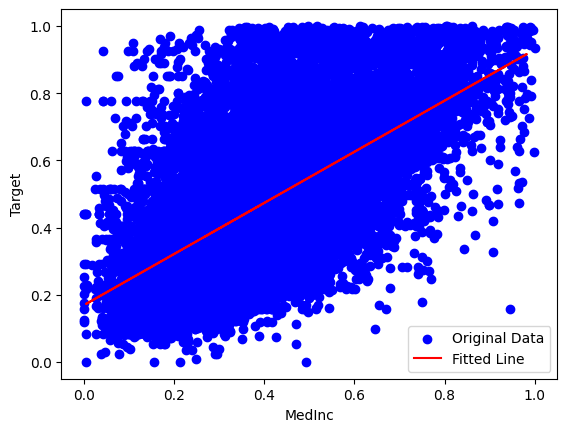

In [ ]:
# Create a scatter plot to visualize the original data points.
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the fitted line based on the linear regression model's predictions.
plt.plot(X_test, y_pred, color='red', label='Fitted Line')

# Set labels for the x and y axes.
plt.xlabel('MedInc')
plt.ylabel('Target')

# Display a legend to differentiate between original data and the fitted line.
plt.legend()

# Show the plot with the original data and the fitted line.
plt.show()


**Observation:**
- The visual representation includes both the original data points and the fitted regression line, illustrating the relationship between the **MedInc** feature and the **target** variable.

# Method-2: Using tensorflow and keras

This approch uses TensorFlow/Keras to build a simple linear regression model with SGD optimization to predict a target variable. It loads and preprocesses data, standardizes features, and calculates the Mean Squared Error (MSE) as a performance metric.

In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
X = df.MedInc
y = df.Target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Reshape X_train and X_test to 2D arrays with a single column (-1 indicates inferred dimension)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training data
X_test_scaled = scaler.transform(X_test)        # Transform only on the testing data (no fitting)

In [ ]:
# Reshape the target variable to be a 2D array
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Build a linear regression model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
learning_rate = .001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
epochs = 5
batch_size = 10
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test))

Epoch 1/5
1435/1435 [==============================] - 4s 3ms/step - loss: 0.9903 - val_loss: 0.3488
Epoch 2/5
1435/1435 [==============================] - 3s 2ms/step - loss: 0.3467 - val_loss: 0.3387
Epoch 3/5
1435/1435 [==============================] - 3s 2ms/step - loss: 0.3444 - val_loss: 0.3388
Epoch 4/5
1435/1435 [==============================] - 3s 2ms/step - loss: 0.3444 - val_loss: 0.3388
Epoch 5/5
1435/1435 [==============================] - 3s 2ms/step - loss: 0.3444 - val_loss: 0.3388


In [ ]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

113/113 [==============================] - 0s 1ms/step
Mean Squared Error on Test Data: 0.33881647647822416


**Observation**

The mean squared error between the predicted values y_pred and the actual target values y is calculated and printed.
The mean squared error is as given above.